<a href="https://colab.research.google.com/github/sharonnwaobasi/Predicting-Breast-Cancer-in-Women/blob/main/UBER_DATA_ANALYSIS_PROJECT_Sharon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [2]:
data =pd.read_csv('/content/Uber Drives - .csv')

data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


**Check For Missing Values**

In [3]:
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [4]:
data =data.dropna()

In [5]:
data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

**Check Data Types**

In [6]:
data.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

From the above results for data types, python sees Start Date and End Date as object instead of **DATE**.

In the next code we shall format the them

**lets format the date column to the right date format**

In [7]:
data['START_DATE*'] = pd.to_datetime(data['START_DATE*'], format="%m/%d/%Y %H:%M")
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'], format="%m/%d/%Y %H:%M")

<ipython-input-7-fd8c06ffb241>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['START_DATE*'] = pd.to_datetime(data['START_DATE*'], format="%m/%d/%Y %H:%M")
<ipython-input-7-fd8c06ffb241>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['END_DATE*'] = pd.to_datetime(data['END_DATE*'], format="%m/%d/%Y %H:%M")


**Re-check the data types to see the the format reflected**

In [8]:
data.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

Here have successfully converted the **Startand End Date** from object into datetimes.

**Create an empty Lists to use to add columns in our original dataset for HOURS, DAYS, DAYOFWEEK, MONTH, WEEKDAY**

Here we are going to extract all the **Hours**, **Days**,**DAYOFWEEK**, **MONTH** separately so they can have their own columns.

In [9]:
hour=[]
day=[]
dayofweek=[]
month=[]
weekday=[]
for x in data['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
data['HOUR']=hour
data['DAY']=day
data['DAY_OF_WEEK']=dayofweek
data['MONTH']=month
data['WEEKDAY']=weekday

<ipython-input-9-e6f09d244fc1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['HOUR']=hour
<ipython-input-9-e6f09d244fc1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DAY']=day
<ipython-input-9-e6f09d244fc1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

**Check our data head**

In [10]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


**Check the various categories present in the dataset**

In [11]:
data['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

Here most people book ride for **Business Purposes** than for **Personal Purposes**

**Lets visualize the above result**

<Axes: xlabel='CATEGORY*', ylabel='count'>

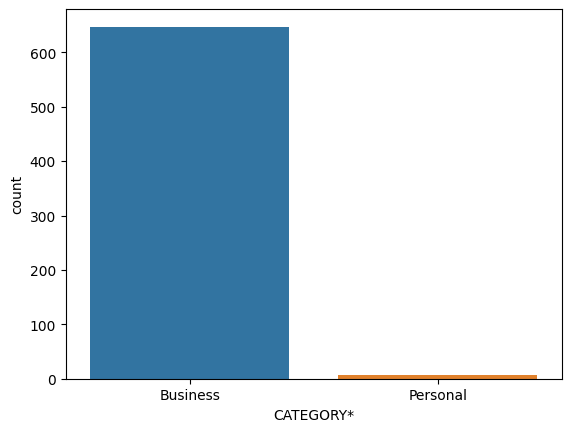

In [12]:
sns.countplot(x='CATEGORY*',data=data)

**Check How long do people travel with Uber**

<Axes: ylabel='Frequency'>

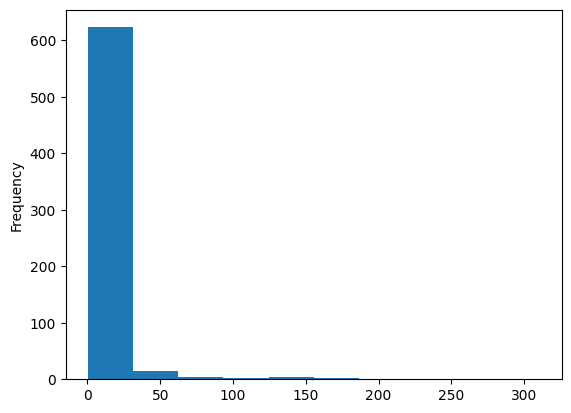

In [13]:
data['MILES*'].plot.hist()

From the above result, most people travel to a short miles ie. from one mile to 50 miles

**Check What Hour do most people take Uber to their destination**

Text(0.5, 1.0, 'Number of Trips Vs hours')

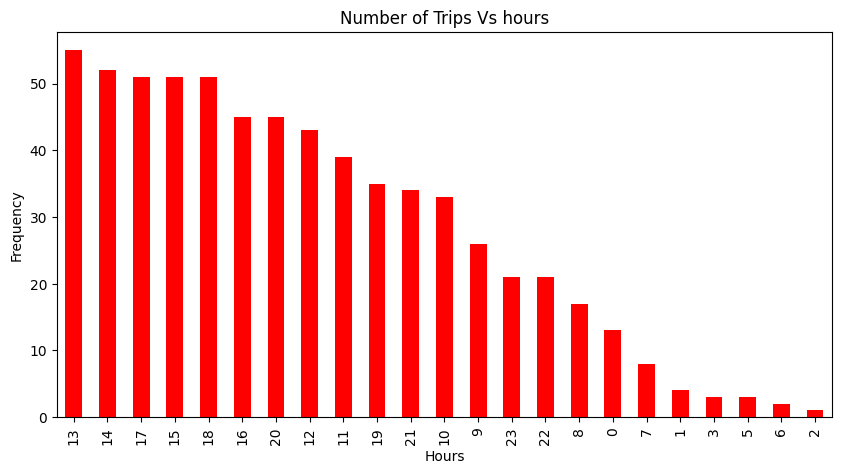

In [14]:
hours = data['START_DATE*'].dt.hour.value_counts()
hours.plot(kind='bar',color='red',figsize=(10,5))

plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of Trips Vs hours')

From the results, we can see that most people book Uber by 1mp, 2mp, 5mp,3mp etc.

If the Uber company wants to attract more customers, they should offer discount during these hot hours.

**Check The Purpose of the Trips**

<Axes: >

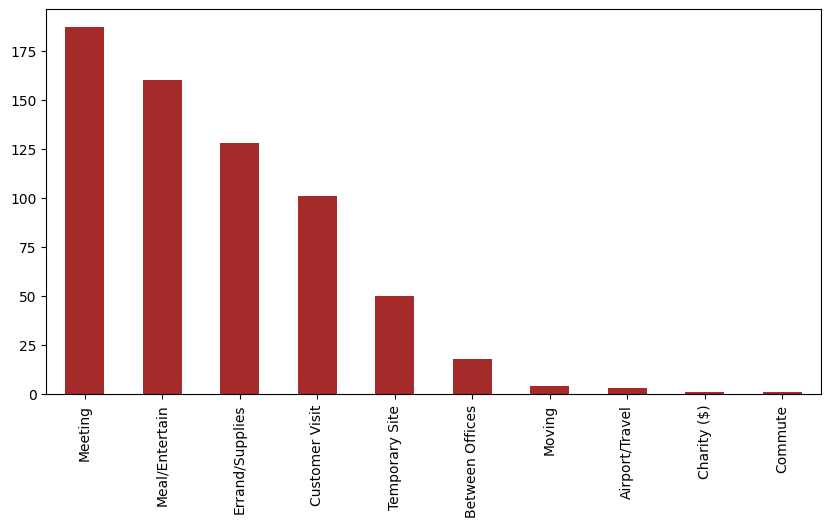

In [15]:
data['PURPOSE*'].value_counts().plot(kind='bar',figsize=(10,5),color='brown')

Here most people book their rides for **Meetings**,**Meal/Entertain**,**Errands/Suppliees**

So we can see the **Top 2, Top 3, Top 4, and Top 5 events for the booking**.

From here the Uber company can attract them more by giving discounts.


**Check which Day has the Highest Number of Trips**

<Axes: >

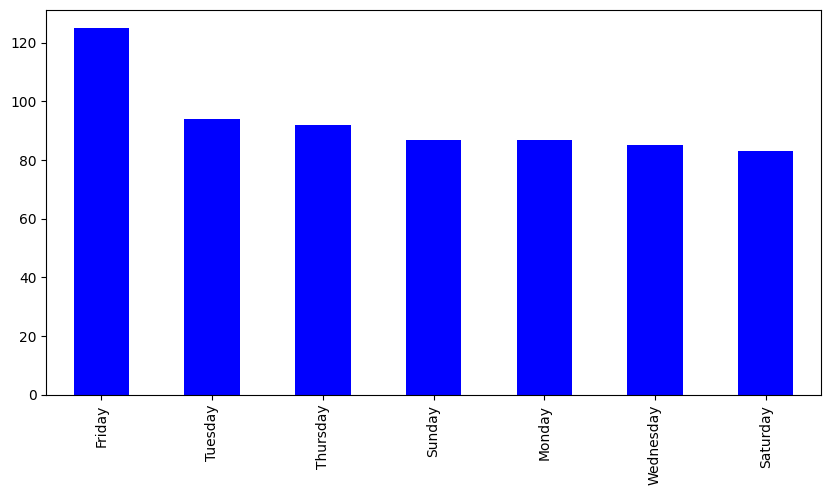

In [16]:
data['WEEKDAY'].value_counts().plot(kind='bar',figsize=(10,5),color='blue')

From the above result, we can see that on **FRIDAYS AND TUESDAYS AND THURSDAYS** are the three Top days for high bookink.

Here the Uber company can place an **Advert** on these top days for more bookings and discount for those days that are not doing well to improve them


**What Are The Number Of Trips Per Each Day?**

<Axes: >

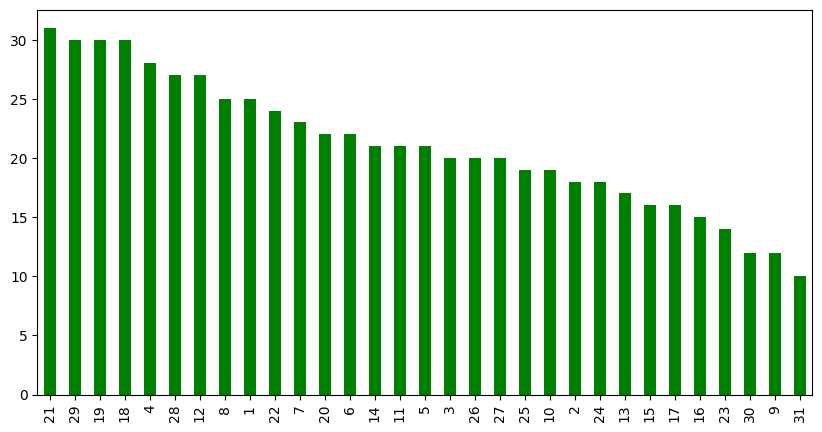

In [17]:
data['DAY'].value_counts().plot(kind='bar',figsize=(10,5),color='green')

**What Are The Trips In The Month**

<Axes: >

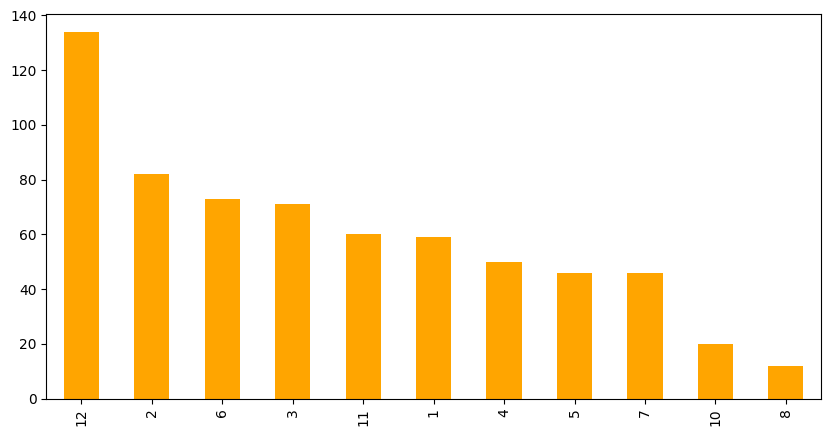

In [18]:
data['MONTH'].value_counts().plot(kind='bar',figsize=(10,5),color='orange')

Here on December people book the highest, followed by February, June, March etc.

And on August people book the smallest.

**Check for the starting points of trips. Where Do People Start Boarding Their Trip From Mostly**

<Axes: >

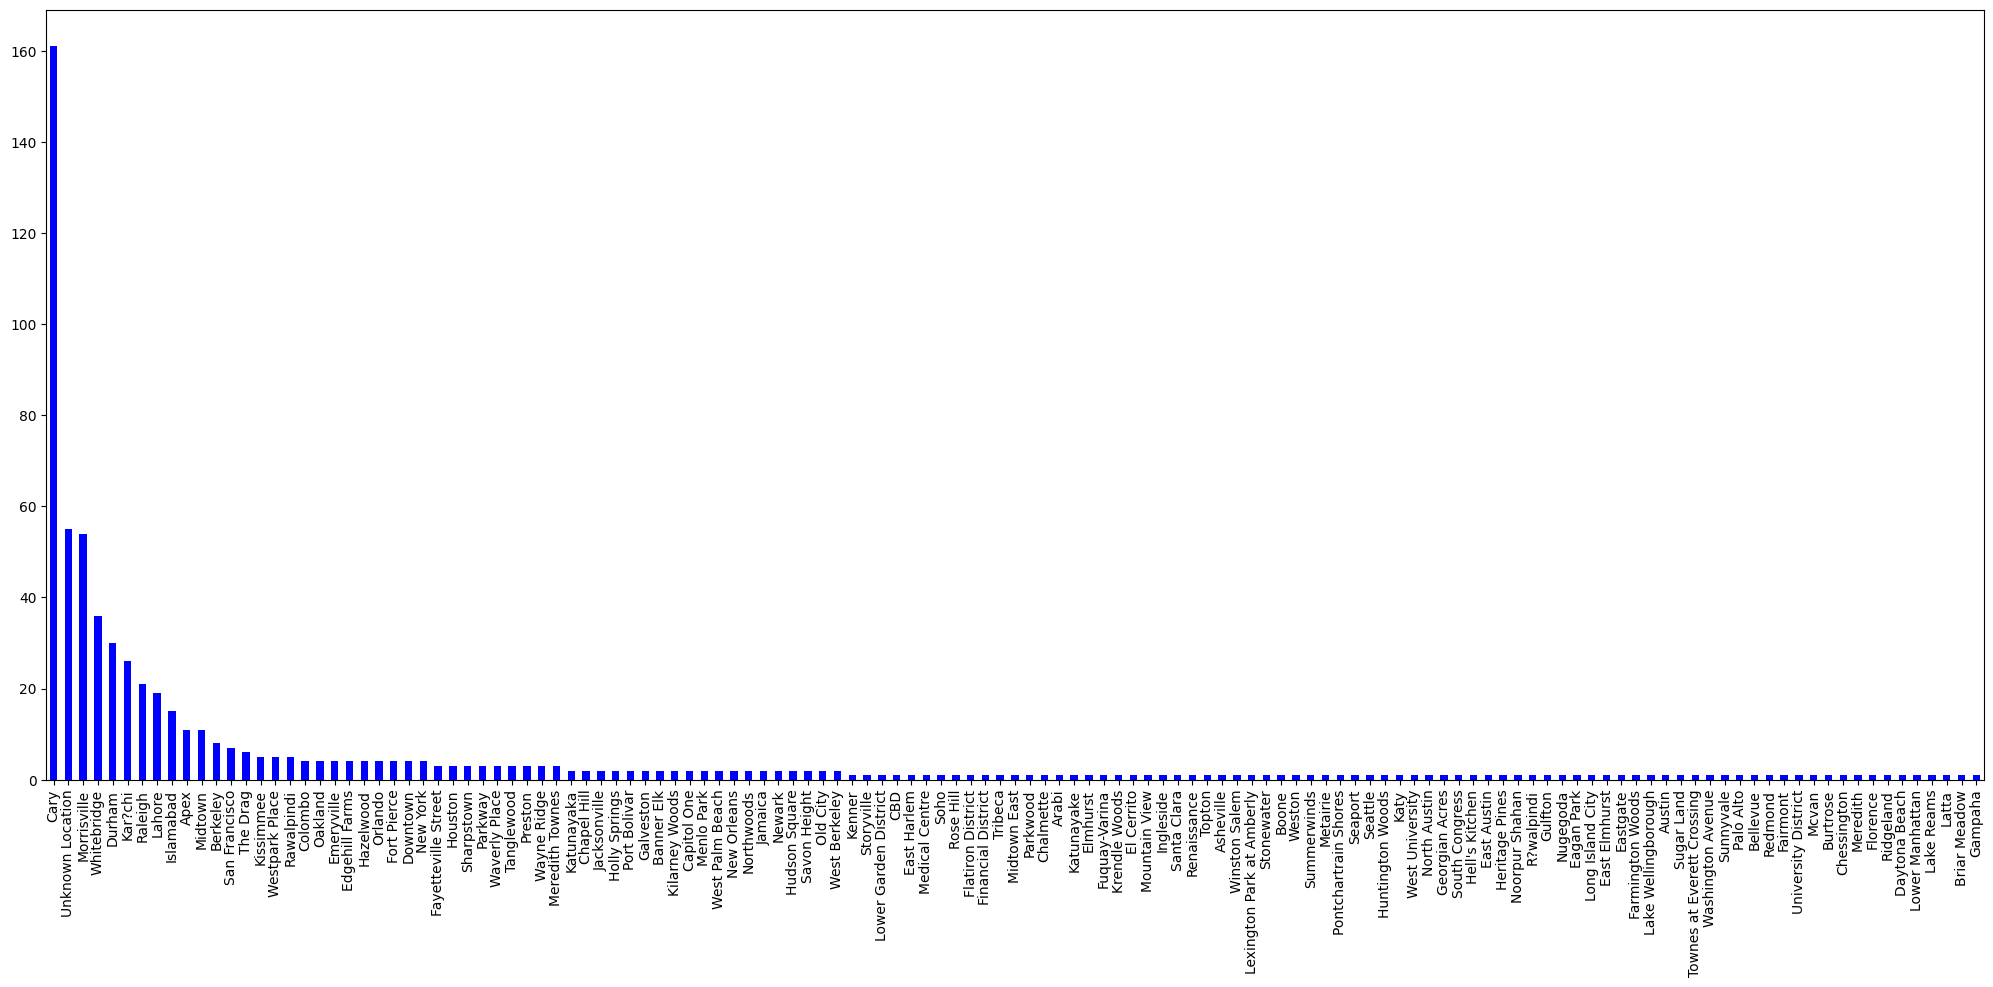

In [20]:
data['START*'].value_counts().plot(kind='bar',figsize=(25,10),color='blue')

Here most people start their trip from **CARY**

##**THE END OF THE THIS UBER PROJECT...**